# Generating Simulated Data with `stdpopsim`

In [1]:
# Import modules.
import demesdraw
import stdpopsim
import msprime
from matplotlib import pyplot as plt

/Users/jds/Library/Caches/pypoetry/virtualenvs/leiden-paper-Z6nacdtr-py3.9/lib/python3.9/site-packages/stdpopsim/catalog/HomSap/demographic_models.py:158: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.head(1) - 1), rate=0
/Users/jds/Library/Caches/pypoetry/virtualenvs/leiden-paper-Z6nacdtr-py3.9/lib/python3.9/site-packages/stdpopsim/catalog/HomSap/demographic_models.py:161: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.tail(1) + 1), rate=0


In [2]:
# Intialize the species information.
species = stdpopsim.get_species('HomSap')
# For every demographic model...
for x in species.demographic_models:
    # Print the model id.
    print(x.id)

OutOfAfricaExtendedNeandertalAdmixturePulse_3I21
OutOfAfrica_3G09
OutOfAfrica_2T12
Africa_1T12
AmericanAdmixture_4B11
OutOfAfricaArchaicAdmixture_5R19
Zigzag_1S14
AncientEurasia_9K19
PapuansOutOfAfrica_10J19
AshkSub_7G19
OutOfAfrica_4J17
Africa_1B08
AncientEurope_4A21


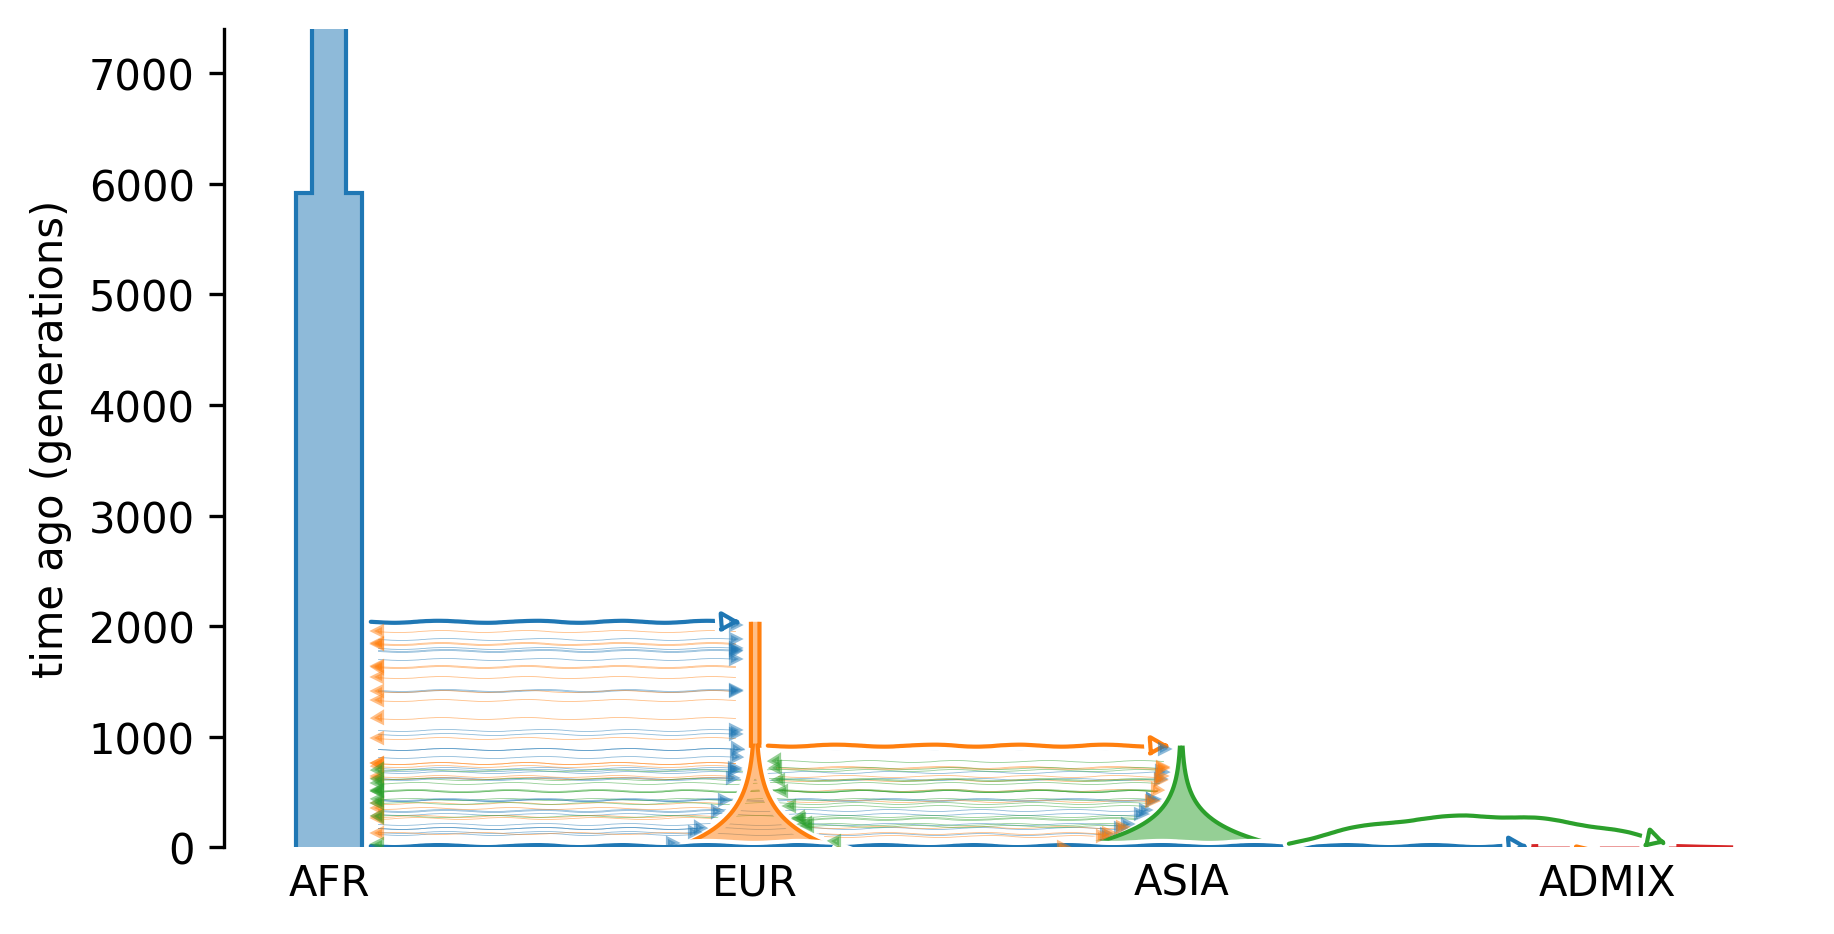

In [3]:
# Intialize the demographic model.
demo = species.get_demographic_model('AmericanAdmixture_4B11')
# Convert the demographic model to a demes graph.
graph = msprime.Demography.to_demes(demo.model)
# Intialize the figure.
fig = plt.figure(
    figsize=(6, 3),
    constrained_layout=True,
    dpi=300.0,
)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the demes graph.
demesdraw.tubes(
    graph,
    ax=ax,
    seed=42,
)
# Show the plot.
plt.show()

In [4]:
demo.model

Demography(populations=[Population(initial_size=14474, growth_rate=0.0, name='AFR', description='Contemporary African population', extra_metadata={'id': 'AFR', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=0), Population(initial_size=34038.718872685706, growth_rate=0.0038, name='EUR', description='Contemporary European population', extra_metadata={'id': 'EUR', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=1), Population(initial_size=45851.568512352045, growth_rate=0.0048, name='ASIA', description='Contemporary Asian population', extra_metadata={'id': 'ASIA', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=2), Population(initial_size=54663.56401171527, growth_rate=0.05, name='ADMIX', description='Modern admixed population', extra_metadata={'id': 'ADMIX', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=3)], events=[MassMigration(time=12, source=3, dest=0, proportion=0.16666666666666666), MassMigration(time=12, source=3, dest=1, proportion=0.4), MassMigration(time=12, source=3, dest=2, proportion=1.0), MigrationRateChange(time=920, rate=0.0, source=-1, dest=-1), MassMigration(time=920, source=2, dest=1, proportion=1.0), PopulationParametersChange(time=920, initial_size=1861, growth_rate=0.0, population=1), MigrationRateChange(time=920, rate=0.00015, source=0, dest=1), MigrationRateChange(time=920, rate=0.00015, source=1, dest=0), MigrationRateChange(time=2040, rate=0.0, source=-1, dest=-1), MassMigration(time=2040, source=1, dest=0, proportion=1.0), PopulationParametersChange(time=5920, initial_size=7310, growth_rate=None, population=0)], migration_matrix=array([[0.00e+00, 2.50e-05, 7.80e-06, 0.00e+00],
       [2.50e-05, 0.00e+00, 3.11e-05, 0.00e+00],
       [7.80e-06, 3.11e-05, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]]))

In [5]:
demo.model.debug()

In [6]:
sample_size_per_population = 1000
ts = msprime.sim_ancestry(
    samples=[
        msprime.SampleSet(sample_size_per_population, ploidy=2, population='AFR'), # pop id 0
        msprime.SampleSet(sample_size_per_population, ploidy=2, population='EUR'),
        msprime.SampleSet(sample_size_per_population, ploidy=2, population='ASIA'),
        msprime.SampleSet(sample_size_per_population, ploidy=2, population='ADMIX'), # pop id 3
    ],
    demography=demo.model,
    sequence_length=1_000_000,
    recombination_rate=1e-8,
    random_seed=42,
)
ts

In [7]:
# Overlay mutations.
mts = msprime.sim_mutations(
    tree_sequence=ts, rate=1.5e-8,
    model='jc69', random_seed=42,
    discrete_genome=False,
)
mts

In [8]:
geno_mat = mts.genotype_matrix()

In [9]:
geno_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [18]:
geno_mat.shape

(7243, 800)

In [29]:
object_methods = [method_name for method_name in dir(mts)
                  if callable(getattr(mts, method_name))]

In [30]:
object_methods

['Fst',
 'Tajimas_D',
 'Y1',
 'Y2',
 'Y3',
 '_TreeSequence__k_way_sample_set_stat',
 '_TreeSequence__one_way_sample_set_stat',
 '_TreeSequence__run_windowed_stat',
 '__class__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_check_genomic_range',
 '_edge_diffs_forward',
 '_edge_diffs_reverse',
 '_haplotypes_array',
 '_repr_html_',
 'alignments',
 'allele_frequency_spectrum',
 'as_fasta',
 'as_nexus',
 'as_vcf',
 'aslist',
 'at',
 'at_index',
 'breakpoints',
 'check_index',
 'coalescence_time_distribution',
 'coiterate',
 'count_topologies',
 'decapitate',
 'delete_intervals',
 'delete_sites',
 'diffs',
 'divergence',
 'diversity',
 'draw_svg',
 'draw_text',
 'dump',
 'dump_tables',
 'dump_text',
 'edge',
 'edge_di

In [36]:
mts.tables.populations

id,metadata
0,"{'description': 'Contemporary African population', 'id': 'AFR', 'na..."
1,"{'description': 'Contemporary European population', 'id': 'EUR', 'n..."
2,"{'description': 'Contemporary Asian population', 'id': 'ASIA', 'nam..."
3,"{'description': 'Modern admixed population', 'id': 'ADMIX', 'name':..."


In [38]:
afr_idx = mts.samples(0)

In [39]:
geno_mat[:, afr_idx]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [24]:
mts.Fst(sample_sets=[mts.samples(0),mts.samples(2)]
)


0.08491470351690111